# 다중로지스틱회귀 (IRIS 데이터셋)

종속변수가 세 개 이상의 분류를 갖는 로지스틱회귀.

## #01. 준비작업

### [1] 패키지 가져오기

In [9]:
import warnings
warnings.filterwarnings(action='ignore')

from helper.util import *
from helper.plot import *
from helper.analysis import *
from helper.classification import *

### [2] 데이터 가져오기

붓꽃(iris)은 관상용으로도 재배되는 아름다운 꽃이며 크기와 색상이 다른 많은 종이 있다.

세 붓꽃 종의 이름은 `Versicolor`, `Setosa`, `Virginica`이며 각 종에 따라 꽃받침의 길이와 너비, 꽃잎의 길이와 너비가 약간씩 차이가 난다.

> https://www.kaggle.com/datasets/uciml/iris

![img](res/iris.png)

In [10]:
origin = my_read_excel("https://data.hossam.kr/mldata/iris.xlsx", categories=['Species'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sepal.Length  150 non-null    float64 
 1   Sepal.Width   150 non-null    float64 
 2   Petal.Length  150 non-null    float64 
 3   Petal.Width   150 non-null    float64 
 4   Species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

데이터프레임 상위 5개 행
+----+----------------+---------------+----------------+---------------+-----------+
|    |   Sepal.Length |   Sepal.Width |   Petal.Length |   Petal.Width | Species   |
|----+----------------+---------------+----------------+---------------+-----------|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 | setosa    |
|  1 |            4.9 |             3 |            1.4 |           0.2 | setosa    |
|  2 |            4.7 |           3.2 |            1.3 |           0.2 | setosa    |
|  3

## #02. 탐색적 데이터 분석

### [1] 품종에 따른 데이터 분포 확인

이항분류의 경우 커널밀도 함수등으로 종속변수 따른 데이터 분포를 확인

다항분류의 경우 산점도 그래프를 통해 종속변수에 따른 데이터 군집이 존재 하는지를 확인

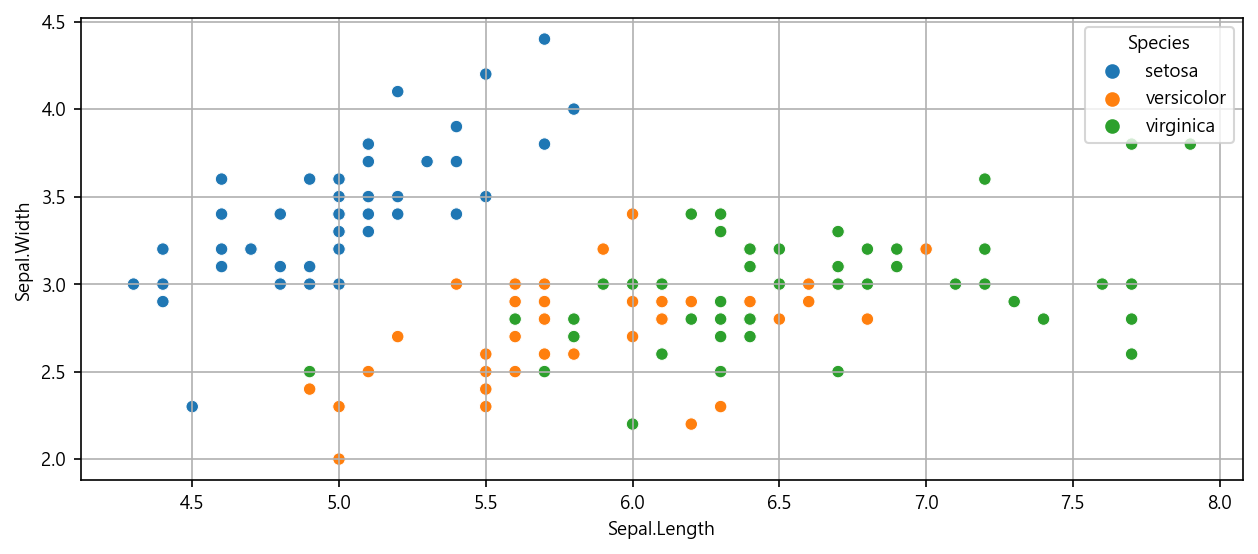

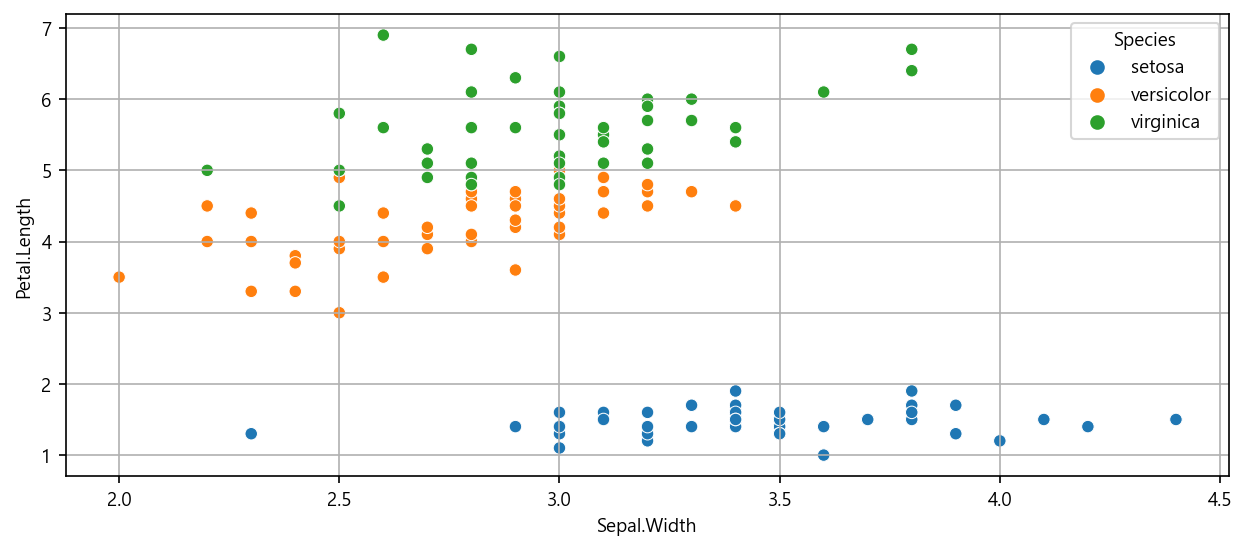

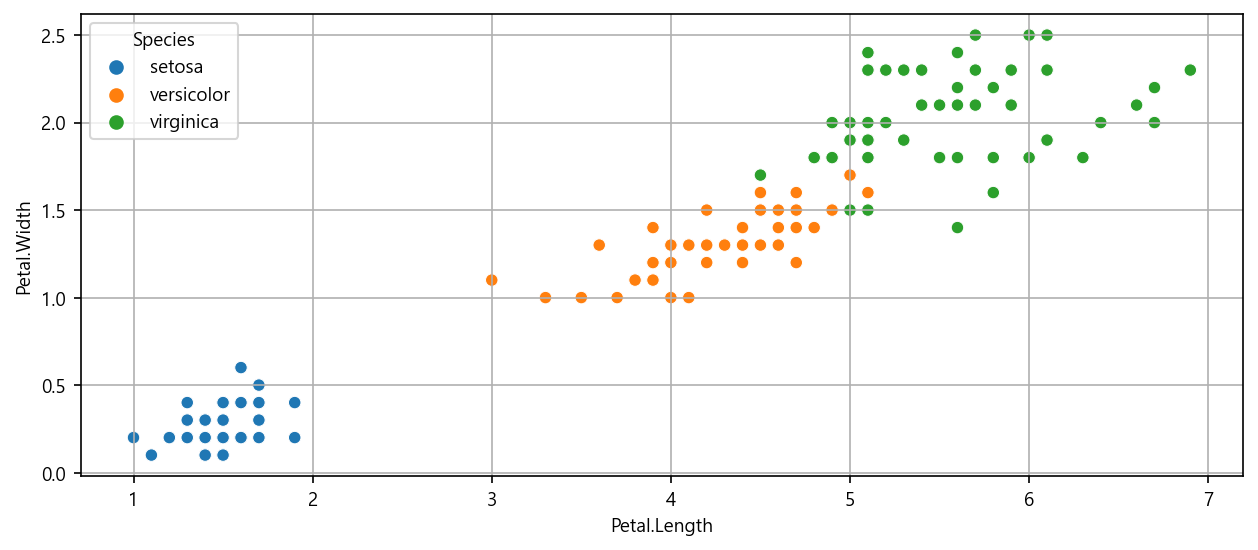

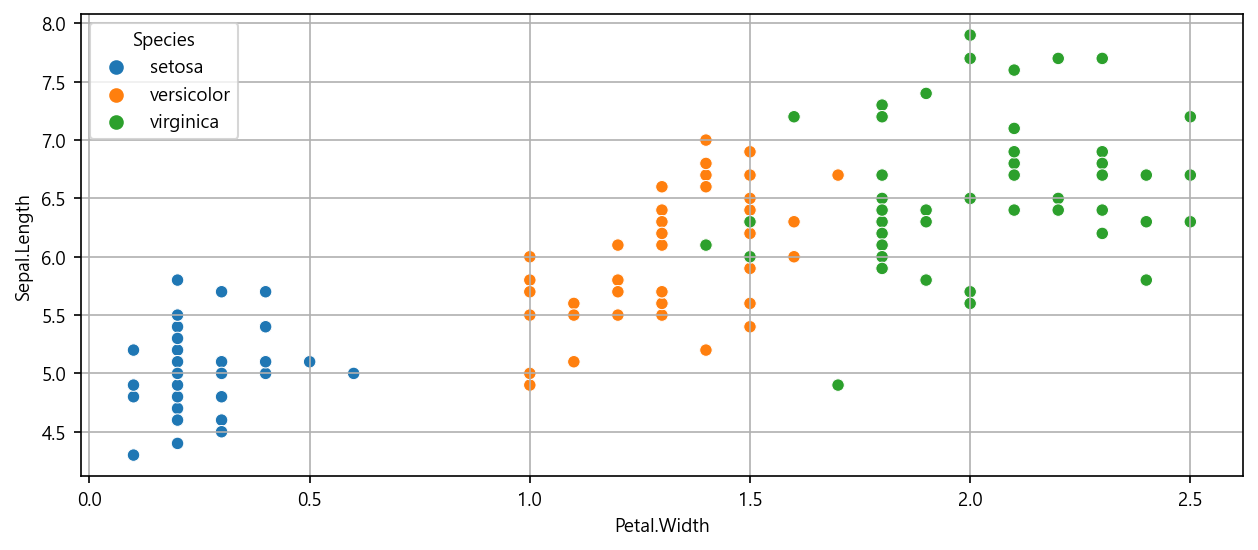

In [11]:
names = origin.columns[:-1]
size = len(names)

for i in range(0, size):
    j = (i + 1) % size
    #print(i, j)
    #print(names[i], names[j])
    my_scatterplot(origin, xname=names[i], yname=names[j], hue='Species')

> 명확하게 품종에 따라 군집이 형성되어 있는 것을 확인할 수 있다.

### [2] 상자그림 확인

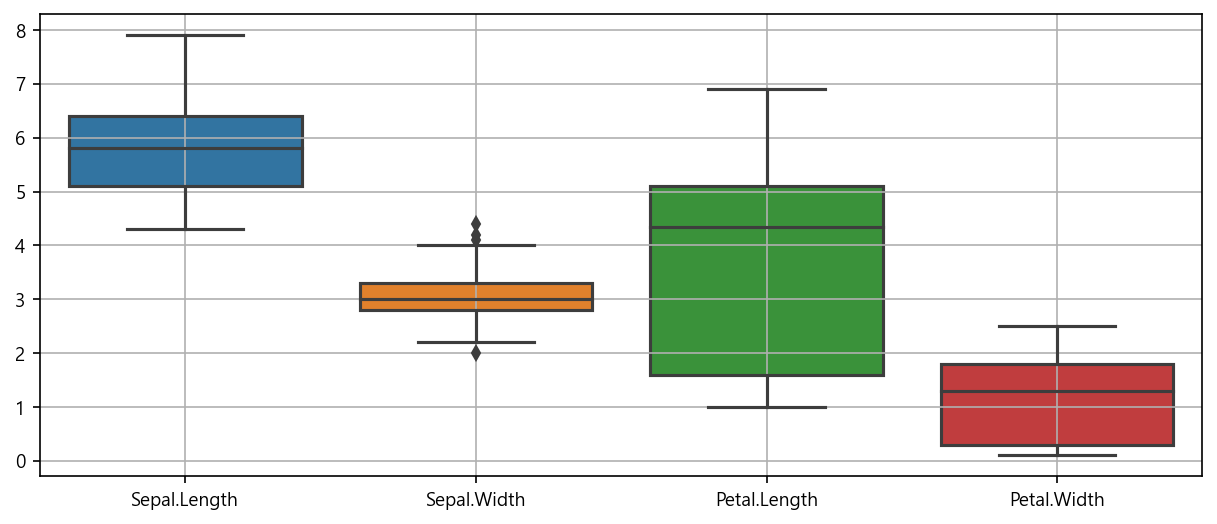

In [12]:
my_boxplot(origin)

> 데이터 스케일링은 필요해 보인다.

## #03. 데이터 전처리

### [1] 데이터 스케일링

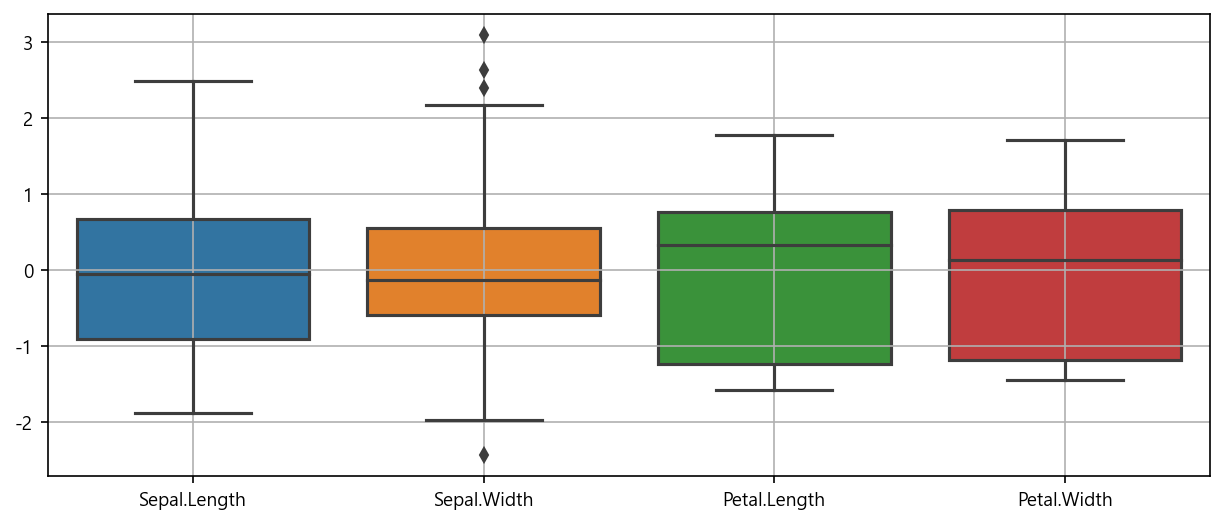

In [13]:
df = my_standard_scaler(origin, yname='Species')
my_boxplot(df)

> 이상치의 수가 크지 않고, 종속변수가 50, 50, 50으로 균형을 이루고 있으므로 이 균형을 유지하기 위해 이상치 제거는 하지 않도록 함.

### [2] 종속변수 라벨링

In [14]:
df2 = my_labelling(df, 'Species')
my_pretty_table(df2.head())

+----+----------------+---------------+----------------+---------------+-----------+
|    |   Sepal.Length |   Sepal.Width |   Petal.Length |   Petal.Width |   Species |
|----+----------------+---------------+----------------+---------------+-----------|
|  0 |      -0.900681 |         1.019 |       -1.34023 |      -1.31544 |         0 |
|  1 |       -1.14302 |     -0.131979 |       -1.34023 |      -1.31544 |         0 |
|  2 |       -1.38535 |      0.328414 |       -1.39706 |      -1.31544 |         0 |
|  3 |       -1.50652 |     0.0982173 |       -1.28339 |      -1.31544 |         0 |
|  4 |       -1.02185 |        1.2492 |       -1.34023 |      -1.31544 |         0 |
+----+----------------+---------------+----------------+---------------+-----------+


## #04. 로지스틱 회귀 모형

### [1] 데이터 분할

In [15]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='Species', test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### [2] 로지스틱 회귀 구현

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 13 |    10 | l2        |          0.966667 |
| 16 |   100 | l2        |          0.966667 |
| 10 |     1 | l2        |          0.958333 |
|  7 |   0.1 | l2        |          0.908333 |
|  4 |  0.01 | l2        |          0.858333 |
|  1 | 0.001 | l2        |          0.508333 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.991667 |     0.966667 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.991667 |     0.952381 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
|

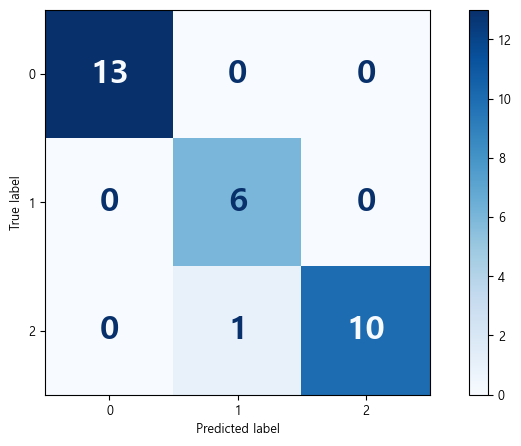


[ROC/PR Curve]


ValueError: multiclass format is not supported

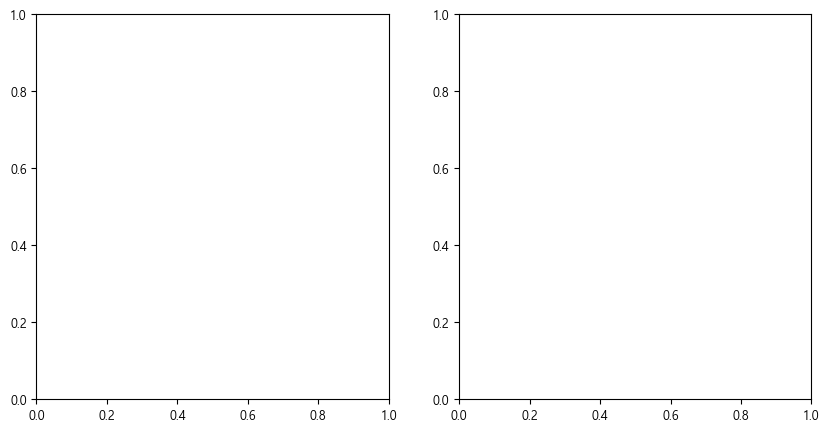

In [16]:
my_logistic_classification(x_train, y_train, x_test, y_test)